In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
import os

In [ ]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 4.0 MB 9.3 MB/s 
     |████████████████████████████████| 895 kB 47.5 MB/s 
     |████████████████████████████████| 596 kB 44.3 MB/s 
     |████████████████████████████████| 6.5 MB 45.8 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 325 kB 12.0 MB/s 
     |████████████████████████████████| 212 kB 53.3 MB/s 
     |████████████████████████████████| 136 kB 51.7 MB/s 
     |████████████████████████████████| 1.1 MB 48.1 MB/s 
     |████████████████████████████████| 127 kB 50.8 MB/s 
     |████████████████████████████████| 144 kB 37.3 MB/s 
     |████████████████████████████████| 271 kB 45.9 MB/s 
     |████████████████████████████████| 94 kB 2.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urlli

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IT350/datasets/mqp/mqp.csv',names=['docid','question1','question2','label'],header=None)
# df = df.astype({'label':int})
df = df.iloc[1:,:]
df['label']=pd.to_numeric(df['label'])
del df["docid"]
# print(df["label"].dtype)

# df.head()

In [ ]:
# df=df.iloc[:4000]
df

,question1,question2,label
1,After how many hour from drinking an antibioti...,I vomited this morning and I am not sure if it...,0
2,Am I over weight (192.9) for my age (39)?,I am a 39 y/o male currently weighing about 19...,1
3,Am I over weight (192.9) for my age (39)?,What diet is good for losing weight? Keto or v...,0
4,Aspirin allergy - is it worth getting a bracelet?,How much Aspirin can I take for my headache wi...,0
5,Aspirin allergy - is it worth getting a bracelet?,My friend told me about this bracelet for Aspi...,1
...,...,...,...
3043,15 million sperm can be a father?,My sperm count is 15 millions and is there a c...,1
3044,26 yo m with history of progressive venous ins...,"Hello doctor, can you please tell me some of t...",0
3045,26 yo m with history of progressive venous ins...,"Hello doctor, I am 26 year old male wth progre...",1
3046,32 weeks pregnant. Headache strange leg weakne...,I am 32 weeks pregnant and had severe headache...,0


In [ ]:
len_of_answers=np.array([])
len_of_questions=np.array([])
df_p = df
for index,row in df.iterrows():
  al = len(row['question2'].split())
  ql = len(row['question1'].split())
  if al > 80 or ql > 32:
    df_p.drop(index, inplace=True)
  len_of_answers=np.append(len_of_answers,al)
  len_of_questions=np.append(len_of_questions,ql)
  
print('questions\nmedian:-',np.median(len_of_questions),'\nmean:-',np.mean(len_of_questions),'\nmin:-',np.min(len_of_questions),'\nmax:-',np.max(len_of_questions))
print('answers\nmedian:-',np.median(len_of_answers),'\nmean:-',np.mean(len_of_answers),'\nmin:-',np.min(len_of_answers),'\nmax:-',np.max(len_of_answers))

questions
median:- 18.0 
mean:- 18.72005251066623 
min:- 3.0 
max:- 53.0
answers
median:- 18.0 
mean:- 20.649491302920907 
min:- 3.0 
max:- 72.0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
train.to_csv('/content/drive/MyDrive/IT350/datasets/mqp/train.csv',index=False)
test.to_csv('/content/drive/MyDrive/IT350/datasets/mqp/test.csv',index=False)

In [ ]:
from datasets import load_dataset

In [ ]:
raw_dataset = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/IT350/datasets/mqp/train.csv',
                                              'test': '/content/drive/MyDrive/IT350/datasets/mqp/test.csv'})

Using custom data configuration default-fbd96dab9ef06a06


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-fbd96dab9ef06a06/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['question1', 'question2', 'label'],
        num_rows: 19667
    })
    test: Dataset({
        features: ['question1', 'question2', 'label'],
        num_rows: 4917
    })
})

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
def tokenize_function1(examples):
    return tokenizer(examples["question1"],max_length=30, padding="max_length",truncation=True)
tokenized_datasets_question1 = raw_dataset.map(tokenize_function1, batched=True)
def tokenize_function2(examples):
    return tokenizer(examples["question2"],max_length=60, padding="max_length",truncation=True)
tokenized_datasets_answer = raw_dataset.map(tokenize_function2, batched=True)

  0%|          | 0/20 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/20 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [ ]:
def extract_features(tokenized_datasets,train_test):
  Y=[]
  X={'input_ids':[],'token_type_ids':[],'attention_mask':[]}
  for i in range(len(tokenized_datasets[train_test])):
    input_ids=tokenized_datasets[train_test][i]['input_ids']
    token_type_ids=tokenized_datasets[train_test][i]['token_type_ids']
    attention_mask=tokenized_datasets[train_test][i]['attention_mask']
    X['input_ids'].append(input_ids)
    X['token_type_ids'].append(token_type_ids)
    X['attention_mask'].append(attention_mask)
    Y.append(tokenized_datasets[train_test][i]['label'])
  X['input_ids']=np.array(X['input_ids'],dtype=np.int32)
  X['token_type_ids']=np.array(X['token_type_ids'],dtype=np.int32)
  X['attention_mask']=np.array(X['attention_mask'],dtype=np.int32)
  Y=np.array(Y,dtype=np.float32)
  return X,Y

In [ ]:
test_data_x1,test_y1=extract_features(tokenized_datasets_question1,'test')
train_data_x1,train_y1=extract_features(tokenized_datasets_question1,'train')
test_data_x2,test_y2=extract_features(tokenized_datasets_answer,'test')
train_data_x2,train_y2=extract_features(tokenized_datasets_answer,'train')

In [ ]:
train_input=[train_data_x1['input_ids'],train_data_x1['attention_mask'],train_data_x1['token_type_ids'],train_data_x2['input_ids'],train_data_x2['attention_mask'],train_data_x2['token_type_ids']]
test_input=[test_data_x1['input_ids'],test_data_x1['attention_mask'],test_data_x1['token_type_ids'],test_data_x2['input_ids'],test_data_x2['attention_mask'],test_data_x2['token_type_ids']]


In [ ]:
import transformers
from transformers import TFBertModel
max_length_q = 30
max_length_a = 60
input_ids1 = tf.keras.layers.Input(
    shape=(max_length_q,), dtype=tf.int32, name="input_ids1"
)

attention_masks1 = tf.keras.layers.Input(
    shape=(max_length_q,), dtype=tf.int32, name="attention_masks1"
)

token_type_ids1 = tf.keras.layers.Input(
    shape=(max_length_q,), dtype=tf.int32, name="token_type_ids1"
)

input_ids2 = tf.keras.layers.Input(
    shape=(max_length_a,), dtype=tf.int32, name="input_ids2"
)

attention_masks2 = tf.keras.layers.Input(
    shape=(max_length_a,), dtype=tf.int32, name="attention_masks2"
)

token_type_ids2 = tf.keras.layers.Input(
    shape=(max_length_a,), dtype=tf.int32, name="token_type_ids2"
)

bert_model1 = transformers.TFBertModel.from_pretrained("bert-base-uncased")

bert_model1.trainable = False

bert_output1 = bert_model1(
    input_ids1, attention_mask=attention_masks1, token_type_ids=token_type_ids1
)
sequence_output1 = bert_output1.last_hidden_state
pooled_output1 = bert_output1.pooler_output

bi_lstm1 = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(64, return_sequences=True)
)(sequence_output1)

bert_model2 = transformers.TFBertModel.from_pretrained("bert-base-uncased")

bert_model2.trainable = False 

bert_output2 = bert_model2(
    input_ids2, attention_mask=attention_masks2, token_type_ids=token_type_ids2
)
sequence_output2 = bert_output2.last_hidden_state
pooled_output2 = bert_output2.pooler_output

bi_lstm2 = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(64, return_sequences=True)
)(sequence_output2)

merged = tf.keras.layers.concatenate([bi_lstm1, bi_lstm2],axis=1)
avg_pool = tf.keras.layers.GlobalAveragePooling1D()(merged)
max_pool = tf.keras.layers.GlobalMaxPooling1D()(merged)
concat = tf.keras.layers.concatenate([avg_pool, max_pool])
dropout = tf.keras.layers.Dropout(0.3)(concat)
output = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)

model = tf.keras.models.Model(inputs=[input_ids1, attention_masks1, token_type_ids1,input_ids2, attention_masks2, token_type_ids2], outputs=output)
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=["acc"],
)
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are in

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids1 (InputLayer)        [(None, 30)]         0           []                               
                                                                                                  
 attention_masks1 (InputLayer)  [(None, 30)]         0           []                               
                                                                                                  
 token_type_ids1 (InputLayer)   [(None, 30)]         0           []                               
                                                                                                  
 input_ids2 (InputLayer)        [(None, 60)]         0           []                               
                                                                                            

In [ ]:
#Fine tuning
bert_model1.trainable=True
bert_model2.trainable=True
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005),
    loss="binary_crossentropy",
    metrics=["acc"],
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids1 (InputLayer)        [(None, 30)]         0           []                               
                                                                                                  
 attention_masks1 (InputLayer)  [(None, 30)]         0           []                               
                                                                                                  
 token_type_ids1 (InputLayer)   [(None, 30)]         0           []                               
                                                                                                  
 input_ids2 (InputLayer)        [(None, 60)]         0           []                               
                                                                                            

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/IT350/models/Siamese_BERT_QA_trainable_false_3030/model.h5',custom_objects={'TFBertModel':TFBertModel})

In [ ]:
#training qa with bert siamese trainable false network maxl(40 40) on trainable false 10 epochs batch size 32 => val accuracy 78%
history=model.fit(train_input,train_y1,validation_data=(test_input,test_y1),epochs=5,batch_size=32)

Epoch 1/5
615/615 [==============================] - 447s 728ms/step - loss: 0.5594 - acc: 0.7082 - val_loss: 0.5396 - val_acc: 0.7419
Epoch 2/5
615/615 [==============================] - 447s 727ms/step - loss: 0.5422 - acc: 0.7243 - val_loss: 0.5150 - val_acc: 0.7635
Epoch 3/5
615/615 [==============================] - 447s 728ms/step - loss: 0.5181 - acc: 0.7432 - val_loss: 0.4943 - val_acc: 0.7767
Epoch 4/5
615/615 [==============================] - 447s 726ms/step - loss: 0.4983 - acc: 0.7565 - val_loss: 0.4844 - val_acc: 0.7802
Epoch 5/5
615/615 [==============================] - 446s 726ms/step - loss: 0.4895 - acc: 0.7601 - val_loss: 0.4763 - val_acc: 0.7802


In [ ]:
history=model.fit(train_input,train_y1,validation_data=(test_input,test_y1),epochs=3,batch_size=32)

Epoch 1/3
615/615 [==============================] - 1092s 2s/step - loss: 0.4627 - acc: 0.7825 - val_loss: 0.4576 - val_acc: 0.7989
Epoch 2/3
615/615 [==============================] - 1037s 2s/step - loss: 0.4319 - acc: 0.8057 - val_loss: 0.4525 - val_acc: 0.8017
Epoch 3/3
615/615 [==============================] - 1038s 2s/step - loss: 0.4091 - acc: 0.8211 - val_loss: 0.4505 - val_acc: 0.8019


In [ ]:
model.save('/content/drive/MyDrive/IT350/models/Siamese_BERT_QA_trainable_false_30_60/model.h5')

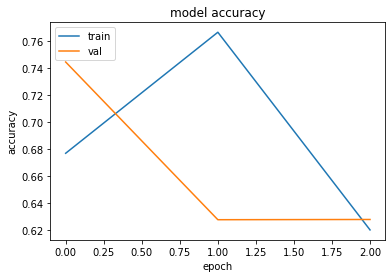

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()